## 빅데이터 활용 AI 설계
# AutoEncoder : Cifar-10 컬러 이미지 적용

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Cifar-10 로딩

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (_, _) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((50000, 32, 32, 3), dtype('uint8'), 255, 0)

In [4]:
display(y_train.shape, y_train[:10])

(50000, 1)

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [0]:
X_train = X_train[y_train.ravel()==1]/255 # 자동차

In [0]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((5000, 32, 32, 3), dtype('float64'), 1.0, 0.0)

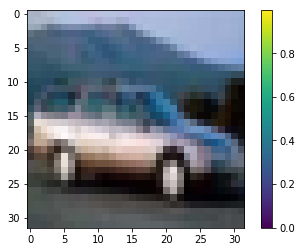

In [6]:
plt.imshow(X_train[0])
plt.colorbar()

### 인코더 생성

In [0]:
from keras.models import Model
from keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose

In [0]:
input = Input((32,32,3))

x = Conv2D(32, (3,3), strides=2, padding='same', activation='relu')(input)
x = Conv2D(64, (3,3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, padding='same', activation='relu')(x)

x = Flatten()(x)
latent = Dense(50)(x)

- 인코더의 출력은 10개의 벡터값이다.
- 이 값을 잠재공간벡터(latent vector) 라고 한다.
- 즉, 28\*28\*1 의 이미지를 10개의 숫자로 축약하였다.

In [11]:
encoder = Model(input, latent)

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                102450    
Total params: 195,698
Trainable params: 195,698
Non-trainable params: 0
_____________________________________________________

### 디코더 생성

In [0]:
input2 = Input((50,))

x2 = Dense(4*4*128, activation='relu')(input2)
x2 = Reshape((4,4,128))(x2)

x2 = Conv2DTranspose(64, (3,3), strides=2, padding='same', activation='relu')(x2)
x2 = Conv2DTranspose(32, (3,3), strides=2, padding='same', activation='relu')(x2)

output = Conv2DTranspose(3, (3,3), strides=2, padding='same', activation='relu')(x2)

In [13]:
decoder = Model(input2, output)

decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              104448    
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 64)          73792     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 32, 32, 3)         867       
Total params: 197,571
Trainable params: 197,571
Non-trainable params: 0
_____________________________________________________

### 오토인코더 구성

In [14]:
autoencoder = Model(input, decoder(encoder(input)))

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
model_2 (Model)              (None, 50)                195698    
_________________________________________________________________
model_3 (Model)              (None, 32, 32, 3)         197571    
Total params: 393,269
Trainable params: 393,269
Non-trainable params: 0
_________________________________________________________________


In [15]:
autoencoder.compile(loss='mse', optimizer='rmsprop', metrics=['acc'])

W0830 00:07:43.025096 140153827903360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [16]:
autoencoder.fit(X_train, X_train, batch_size=32, epochs=10, validation_split=0.1)

W0830 00:07:56.002212 140153827903360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0830 00:07:56.011467 140153827903360 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4500 samples, validate on 500 samples
Epoch 1/10
4500/4500 [==============================] - 3s 767us/step - loss: 0.0872 - acc: 0.3497 - val_loss: 0.0418 - val_acc: 0.3929
Epoch 2/10
4500/4500 [==============================] - 2s 394us/step - loss: 0.0492 - acc: 0.3783 - val_loss: 0.0368 - val_acc: 0.3856
Epoch 3/10
4500/4500 [==============================] - 2s 395us/step - loss: 0.0386 - acc: 0.3881 - val_loss: 0.0436 - val_acc: 0.3958
Epoch 4/10
4500/4500 [==============================] - 2s 393us/step - loss: 0.0337 - acc: 0.3940 - val_loss: 0.0428 - val_acc: 0.3851
Epoch 5/10
4500/4500 [==============================] - 2s 395us/step - loss: 0.0300 - acc: 0.3963 - val_loss: 0.0303 - val_acc: 0.4038
Epoch 6/10
4500/4500 [==============================] - 2s 393us/step - loss: 0.0272 - acc: 0.3986 - val_loss: 0.0229 - val_acc: 0.4041
Epoch 7/10
4500/4500 [==============================] - 2s 397us/step - loss: 0.0251 - acc: 0.4011 - val_loss: 0.0270 - val_acc: 0.4118
E

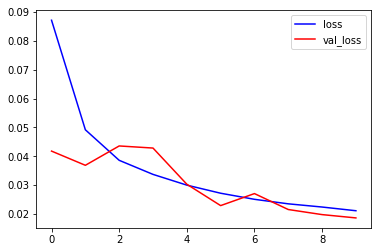

In [17]:
h = autoencoder.history.history

plt.plot(h['loss'], 'b-')
plt.plot(h['val_loss'], 'r-')
plt.legend(['loss', 'val_loss'])

W0830 00:09:02.667154 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:09:02.788266 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:09:02.814584 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


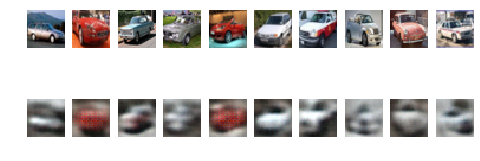

In [18]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_train[[i]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_train[i], vmax=1, vmin=0)
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0], vmax=1, vmin=0)
    plt.axis('off')

In [19]:
autoencoder.fit(X_train, X_train, batch_size=32, epochs=50, validation_split=0.1)

Train on 4500 samples, validate on 500 samples
Epoch 1/50
4500/4500 [==============================] - 2s 393us/step - loss: 0.0196 - acc: 0.4498 - val_loss: 0.0175 - val_acc: 0.4926
Epoch 2/50
4500/4500 [==============================] - 2s 394us/step - loss: 0.0186 - acc: 0.4854 - val_loss: 0.0163 - val_acc: 0.5036
Epoch 3/50
4500/4500 [==============================] - 2s 393us/step - loss: 0.0176 - acc: 0.5005 - val_loss: 0.0168 - val_acc: 0.4909
Epoch 4/50
4500/4500 [==============================] - 2s 396us/step - loss: 0.0169 - acc: 0.5277 - val_loss: 0.0156 - val_acc: 0.5031
Epoch 5/50
4500/4500 [==============================] - 2s 391us/step - loss: 0.0163 - acc: 0.5357 - val_loss: 0.0153 - val_acc: 0.5597
Epoch 6/50
4500/4500 [==============================] - 2s 386us/step - loss: 0.0158 - acc: 0.5465 - val_loss: 0.0145 - val_acc: 0.5451
Epoch 7/50
4500/4500 [==============================] - 2s 388us/step - loss: 0.0154 - acc: 0.5535 - val_loss: 0.0154 - val_acc: 0.5612
E

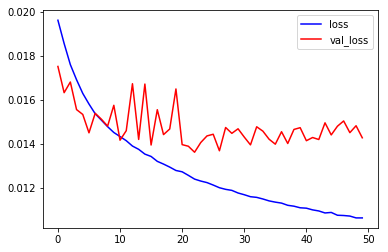

In [20]:
h2 = autoencoder.history.history

plt.plot(h2['loss'], 'b-')
plt.plot(h2['val_loss'], 'r-')
plt.legend(['loss', 'val_loss'])

W0830 00:12:20.196934 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:12:20.226535 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:12:20.303758 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


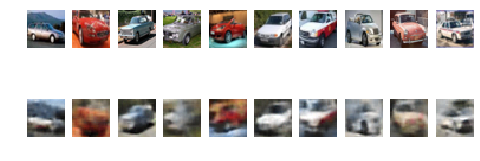

In [22]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_train[[i]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_train[i], vmax=1, vmin=0)
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0], vmax=1, vmin=0)
    plt.axis('off')

- 검증에 사용한 이미지 적용 (뒷부분 이미지)

W0830 00:16:17.755466 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:16:17.808948 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:16:17.837277 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:16:18.042962 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0830 00:16:18.072754 140153827903360 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


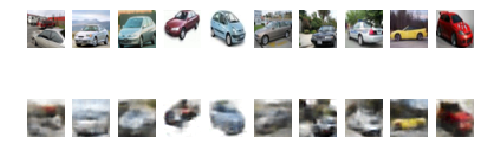

In [23]:
plt.figure(figsize=[8,3])

for i in range(10):
    r = autoencoder.predict(X_train[[-i-1]])

    plt.subplot(2,10,1+i)
    plt.imshow(X_train[-i-1], vmax=1, vmin=0)
    plt.axis('off')

    plt.subplot(2,10,11+i)
    plt.imshow(r[0], vmax=1, vmin=0)
    plt.axis('off')

### 잠재공간 출력값 분석

In [0]:
vectors = encoder.predict(X_train)

In [25]:
vectors.shape

(5000, 50)

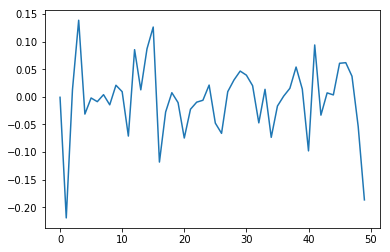

In [26]:
mean_vector = vectors.mean(axis=0)
plt.plot(mean_vector)

### 인코더 가중치(필터) 분석

In [28]:
ws = encoder.get_weights()
len(ws)

8

In [29]:
ws[0].shape

(3, 3, 3, 32)

In [0]:
filters = ws[0].mean(axis=2)

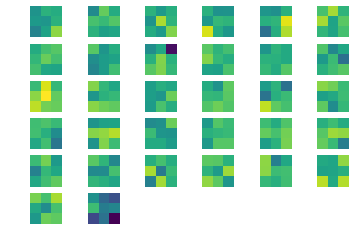

In [38]:
for i in range(32):
  plt.subplot(6,6,i+1)
  filter = filters[:,:,i]
  plt.imshow(filter, vmax=filters.max(), vmin=filters.min())
  plt.axis('off')